# Ames, Iowa : Predicting Sales Prices - XGBoost modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,\
MinMaxScaler, MaxAbsScaler, FunctionTransformer, PowerTransformer
from LR_helper import cat_column_combine_vars, num_new_features,\
label_encode_features, model_results, cat_new_features, std_num_cols, minmax_num_cols
from clean_helper import dtype_update
from dtree_rf_helper import tree_label_encode, tree_model_res
from IPython.display import display
from IPython.display import SVG
import graphviz as gv
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

### Loading cleaned training and testing datasets:-

In [2]:
train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)
print(train_df.shape)
print(test_df.shape)

(1453, 80)
(1457, 79)


### Creating new numerical variables, combining variables and creating new categorical variables:-

In [3]:
# Creating new numerical variable features:-
num_new_features(train_df)
num_new_features(test_df)

# Combining categories in some categorical features:-
cat_column_combine_vars(train_df)
cat_column_combine_vars(test_df)

# Creating new categorical variable features:-
cat_new_features(train_df)
cat_new_features(test_df)

### Label encoding all categorical features (all dataframes):

In [4]:
# Label encoding via helper functions:

tree_label_encode(train_df)
tree_label_encode(test_df)

In [5]:
# Creating a train/test df copy for MinMaxScaler:

train_df_cpy = train_df.copy()
test_df_cpy = test_df.copy()

In [6]:
# Looking at shapes

print(train_df.shape)
print(test_df.shape)
print(train_df_cpy.shape)
print(test_df_cpy.shape)

(1453, 88)
(1457, 87)
(1453, 88)
(1457, 87)


### Standardizing numerical columns for main datasets:

In [7]:
# Standardizing via helper functions:

std_num_cols(train_df)
std_num_cols(test_df)

### Applying MinMax Scaler for copy datasets:

In [8]:
# Standardizing via helper functions:

minmax_num_cols(train_df_cpy)
minmax_num_cols(test_df_cpy)

In [9]:
# Looking at infos

# print(train_df.info())
# print(test_df.info())
# print(train_df_cpy.info())
# print(test_df_cpy.info())

## XGBoost Models:-

In [10]:
## Separating x and y variables for test-train split (main df)

house_x = train_df.drop(['SalePrice'], axis=1)
house_y = train_df['SalePrice']
house_x_cpy = train_df_cpy.drop(['SalePrice'], axis=1)
house_y_cpy = train_df_cpy['SalePrice']

# Train test 70:30 split

trainX, testX, trainY, testY = train_test_split(house_x, house_y, random_state=42, test_size=0.3)
trainXcp, testXcp, trainYcp, testYcp = train_test_split(house_x_cpy, house_y_cpy, random_state=42, test_size=0.3)

### Base models for both:

In [11]:
xgb_st = xgb.XGBRegressor()

tree_model_res(trainX, trainY, testX, testY, xgb_st, show = True)

Train R^2 is equal to 1.000
Test R^2 is equal to 0.910
Train RMSE is equal to 719.645
Test RMSE is equal to 21977.563
The training error is: 0.00008
The test     error is: 0.09023


[8.477811033180682e-05, 0.09022741569167658]

In [12]:
xgb_mx = xgb.XGBRegressor()

tree_model_res(trainXcp, trainYcp, testXcp, testYcp, xgb_mx, show = True)

Train R^2 is equal to 1.000
Test R^2 is equal to 0.910
Train RMSE is equal to 719.645
Test RMSE is equal to 21977.563
The training error is: 0.00008
The test     error is: 0.09023


[8.477811033180682e-05, 0.09022741569167658]

### Model with Box-Cox transformed y variable:

In [13]:
#Transforming variables

trfm = PowerTransformer(method='box-cox')
trainY_trans = trfm.fit_transform(pd.DataFrame(trainY))
testY_trans = trfm.fit_transform(pd.DataFrame(testY))
trainYcp_trans = trfm.fit_transform(pd.DataFrame(trainYcp))
testYcp_trans = trfm.fit_transform(pd.DataFrame(testYcp))

In [14]:
xgb_st = xgb.XGBRegressor()

tree_model_res(trainX, trainY_trans, testX, testY_trans, xgb_st, show = True)

Train R^2 is equal to 1.000
Test R^2 is equal to 0.873
Train RMSE is equal to 0.009
Test RMSE is equal to 0.356
The training error is: 0.00009
The test     error is: 0.12682


[9.015175331883452e-05, 0.12681935064966388]

In [15]:
xgb_mx = xgb.XGBRegressor()

tree_model_res(trainXcp, trainYcp_trans, testXcp, testYcp_trans, xgb_mx, show = True)

Train R^2 is equal to 1.000
Test R^2 is equal to 0.873
Train RMSE is equal to 0.009
Test RMSE is equal to 0.356
The training error is: 0.00009
The test     error is: 0.12682


[9.015175331883452e-05, 0.12681935064966388]

### Model with log transformed y variable:

In [16]:
xgb_st = xgb.XGBRegressor()

tree_model_res(trainX, np.log(trainY), testX, np.log(testY), xgb_st, show = True)

Train R^2 is equal to 1.000
Test R^2 is equal to 0.878
Train RMSE is equal to 0.005
Test RMSE is equal to 0.136
The training error is: 0.00014
The test     error is: 0.12155


[0.00014334400369409028, 0.1215534617036097]

In [17]:
xgb_mx = xgb.XGBRegressor()

tree_model_res(trainXcp, np.log(trainYcp), testXcp, np.log(testYcp), xgb_mx, show = True)

Train R^2 is equal to 1.000
Test R^2 is equal to 0.878
Train RMSE is equal to 0.005
Test RMSE is equal to 0.136
The training error is: 0.00014
The test     error is: 0.12155


[0.00014334400369409028, 0.1215534617036097]

### Model with Log transformed x and y variables

In [18]:
#Transforming variables

trfm = FunctionTransformer(func=np.log1p)
trainX_trans = trfm.fit_transform(trainX)
testX_trans = trfm.fit_transform(testX)
trainXcp_trans = trfm.fit_transform(trainXcp)
testXcp_trans = trfm.fit_transform(testXcp)

In [19]:
xgb_st = xgb.XGBRegressor(eta = 0.1)

tree_model_res(trainX_trans, np.log(trainY), testX_trans, np.log(testY), xgb_st, show = True)

Train R^2 is equal to 0.991
Test R^2 is equal to 0.899
Train RMSE is equal to 0.037
Test RMSE is equal to 0.124
The training error is: 0.00855
The test     error is: 0.10134


[0.008551642924878089, 0.10134465930200609]

In [20]:
xgb_mx = xgb.XGBRegressor(eta = 0.1)

tree_model_res(trainXcp_trans, np.log(trainYcp), testXcp_trans, np.log(testYcp), xgb_mx, show = True)

Train R^2 is equal to 0.991
Test R^2 is equal to 0.899
Train RMSE is equal to 0.037
Test RMSE is equal to 0.124
The training error is: 0.00855
The test     error is: 0.10134


[0.008551642924878089, 0.10134465930200609]

## Plotting errors and R^2 values for different n_estimators values for XGB model:

In [21]:
xgb_st

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
n_est_range = range(100, 200, 5)  
train_error = []
test_error = []
train_r2 = []
test_r2 = []

for n_est in n_est_range:
    xgb_reg = xgb.XGBRegressor(eta = 0.1, n_estimators=n_est)
    xgb_reg.fit(trainX_trans, np.log(trainY))
    train_error.append(1 - xgb_reg.score(trainX_trans, np.log(trainY)))
    test_error.append(1 - xgb_reg.score(testX_trans, np.log(testY)))
    train_r2.append(xgb_reg.score(trainX_trans, np.log(trainY)))
    test_r2.append(xgb_reg.score(testX_trans, np.log(testY)))

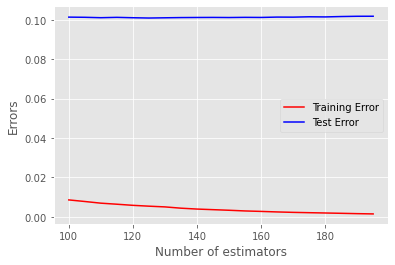

In [23]:
plt.plot(n_est_range, train_error, c='red', label='Training Error')
plt.plot(n_est_range, test_error, c='blue', label='Test Error')
plt.ylabel('Errors')
plt.xlabel('Number of estimators')
plt.legend()
plt.show()

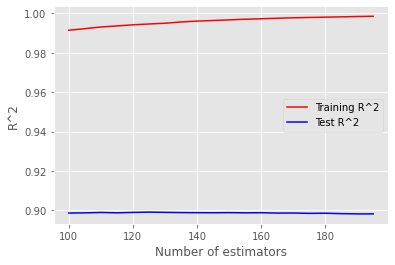

In [24]:
plt.plot(n_est_range, train_r2, c='red', label='Training R^2')
plt.plot(n_est_range, test_r2, c='blue', label='Test R^2')
plt.ylabel('R^2')
plt.xlabel('Number of estimators')
plt.legend()
plt.show()

In [25]:
# We will keep n_estimators=100

## Plotting errors and R^2 values for different max_depth values for XGB model:

In [26]:
depth_range = range(3, 7)
train_error = []
test_error = []
oob_error = []
train_r2 = []
test_r2 = []

for depth in depth_range:
    xgb_reg = xgb.XGBRegressor(eta = 0.1, n_jobs=depth)
    xgb_reg.fit(trainX_trans, np.log(trainY))
    train_error.append(1 - xgb_reg.score(trainX_trans, np.log(trainY)))
    test_error.append(1 - xgb_reg.score(testX_trans, np.log(testY)))
    train_r2.append(xgb_reg.score(trainX_trans, np.log(trainY)))
    test_r2.append(xgb_reg.score(testX_trans, np.log(testY)))

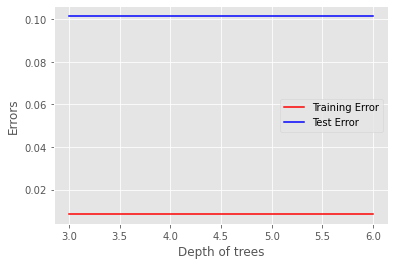

In [27]:
plt.plot(depth_range, train_error, c='red', label='Training Error')
plt.plot(depth_range, test_error, c='blue', label='Test Error')
plt.ylabel('Errors')
plt.xlabel('Depth of trees')
plt.legend()
plt.show()

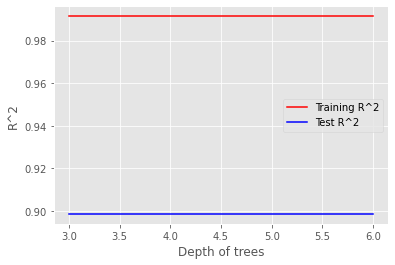

In [28]:
plt.plot(depth_range, train_r2, c='red', label='Training R^2')
plt.plot(depth_range, test_r2, c='blue', label='Test R^2')
plt.ylabel('R^2')
plt.xlabel('Depth of trees')
plt.legend()
plt.show()

In [29]:
# We will keep max_depth=3

## Plotting errors and R^2 values for different n_jobs values for XGB model:

In [30]:
njob_range = range(1, 20)
train_error = []
test_error = []
train_r2 = []
test_r2 = []

for njob in njob_range:
    xgb_reg = xgb.XGBRegressor(eta = 0.1, max_depth=3, n_jobs=njob)
    xgb_reg.fit(trainX_trans, np.log(trainY))
    train_error.append(1 - xgb_reg.score(trainX_trans, np.log(trainY)))
    test_error.append(1 - xgb_reg.score(testX_trans, np.log(testY)))
    train_r2.append(xgb_reg.score(trainX_trans, np.log(trainY)))
    test_r2.append(xgb_reg.score(testX_trans, np.log(testY)))

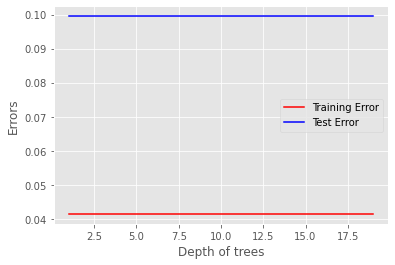

In [31]:
plt.plot(njob_range, train_error, c='red', label='Training Error')
plt.plot(njob_range, test_error, c='blue', label='Test Error')
plt.ylabel('Errors')
plt.xlabel('Depth of trees')
plt.legend()
plt.show()

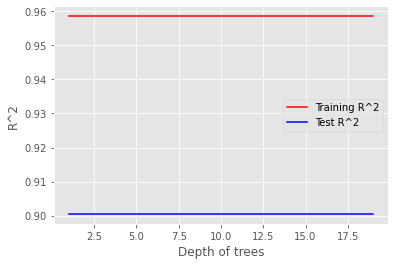

In [32]:
plt.plot(njob_range, train_r2, c='red', label='Training R^2')
plt.plot(njob_range, test_r2, c='blue', label='Test R^2')
plt.ylabel('R^2')
plt.xlabel('Depth of trees')
plt.legend()
plt.show()

In [33]:
xgb_st = xgb.XGBRegressor(eta = 0.1, max_depth=3)

tree_model_res(trainX_trans, np.log(trainY), testX_trans, np.log(testY), xgb_st, show = True)

Train R^2 is equal to 0.959
Test R^2 is equal to 0.900
Train RMSE is equal to 0.081
Test RMSE is equal to 0.123
The training error is: 0.04141
The test     error is: 0.09952


[0.0414121671469041, 0.09951925783082982]

In [34]:
xgb_st = xgb.XGBRegressor(eta = 0.1, max_depth=3)

tree_model_res(trainX_trans, np.log(trainY), testX_trans, np.log(testY), xgb_st, show = True)

Train R^2 is equal to 0.959
Test R^2 is equal to 0.900
Train RMSE is equal to 0.081
Test RMSE is equal to 0.123
The training error is: 0.04141
The test     error is: 0.09952


[0.0414121671469041, 0.09951925783082982]

## Using Grid Search to select best parameters

In [35]:
# Setting x and y variables

x = trainX_trans
y = np.log(trainY)

In [36]:
# Setting the parameter grid 

xgb_fin = xgb.XGBRegressor(eta = 0.1, max_depth=3)

grid_para_xgb = [{
    "learning_rate": np.linspace(1e-2,1,20),
    "min_child_weight" : [1,3,5,7],
    "subsample": [0.4,0.5,0.6,0.7],
    "colsample_bytree" : [0.4,0.5,0.6,0.7]}]

# Running the XGB model through the grid search

xgb_grid = GridSearchCV(xgb_fin, grid_para_xgb, cv=5, return_train_score = True, n_jobs=-1)

xgb_grid.fit(x, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, eta=0.1,
                                    gamma=None, gpu_id=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=3, min_child_weight=None,
                                    missing=nan, monotone_constraints=N...
             param_grid=[{'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
                          'learning_rate': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53

In [37]:
# The best parameters:

xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.11421052631578947,
 'min_child_weight': 3,
 'subsample': 0.6}

In [38]:
# The best score:

xgb_grid.best_score_

0.9021347184317883

In [39]:
# Best estimator training/test errors

print("The training error is: %.5f" % (1 - xgb_grid.best_estimator_.score(trainX_trans, np.log(trainY))))
print("The test     error is: %.5f" % (1 - xgb_grid.best_estimator_.score(testX_trans, np.log(testY))))

The training error is: 0.04462
The test     error is: 0.08728


In [40]:
# Selecting the best model from the Grid Search as the final model

final_xgb = xgb_grid.best_estimator_

In [41]:
# Checking if all parameters are correct:

final_xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.11421052631578947,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 3,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.6,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eta': 0.1}

In [42]:
# Model results:

tree_model_res(trainX_trans, np.log(trainY), testX_trans, np.log(testY), final_xgb, show = True)

Train R^2 is equal to 0.955
Test R^2 is equal to 0.913
Train RMSE is equal to 0.084
Test RMSE is equal to 0.115
The training error is: 0.04462
The test     error is: 0.08728


[0.044624532460832866, 0.08727912612297861]

In [43]:
# Using RFE to select features

from sklearn.feature_selection import RFE

rfe = RFE(estimator=final_xgb, n_features_to_select=25, step=10)

tree_model_res(trainX_trans, np.log(trainY), testX_trans, np.log(testY), rfe, show = True)

Train R^2 is equal to 0.946
Test R^2 is equal to 0.916
Train RMSE is equal to 0.092
Test RMSE is equal to 0.113
The training error is: 0.05351
The test     error is: 0.08436


[0.05351011265557715, 0.08435939877183041]

In [44]:
print(house_x.columns[rfe.support_])

Index(['MSZoning', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars',
       'ScreenPorch', 'SaleCondition', 'sold_age', 'yr_since_remod',
       'Usable_Space'],
      dtype='object')


In [45]:
sel_fet = ['MSZoning', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars',
       'ScreenPorch', 'SaleCondition', 'sold_age', 'yr_since_remod',
       'Usable_Space']

In [46]:
# Final model with selected features

final_xgb1 = xgb_grid.best_estimator_
tree_model_res(trainX_trans[sel_fet], np.log(trainY), testX_trans[sel_fet], np.log(testY), final_xgb1, show = True)

Train R^2 is equal to 0.946
Test R^2 is equal to 0.916
Train RMSE is equal to 0.092
Test RMSE is equal to 0.113
The training error is: 0.05351
The test     error is: 0.08436


[0.05351011265557715, 0.08435939877183041]

## Feature Selection and importance scores calculation

- Xgboost has inbuilt feature selection capabilities for feature selection and highlighting importance scores calculation.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

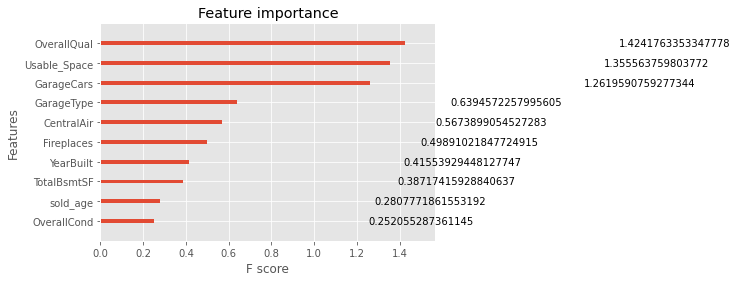

In [47]:
plot_importance(final_xgb,importance_type='gain', max_num_features=10)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

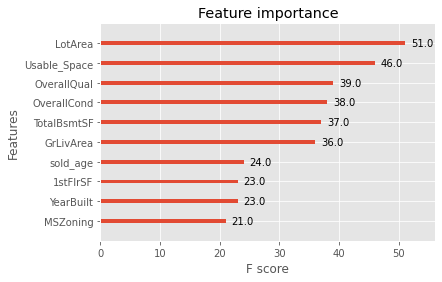

In [48]:
plot_importance(final_xgb,importance_type='weight', max_num_features=10)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

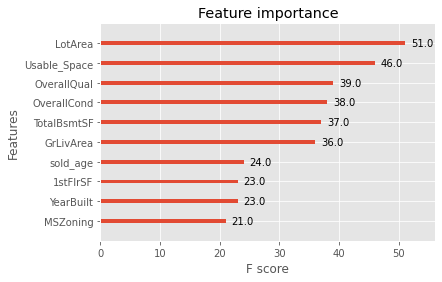

In [49]:
plot_importance(final_xgb1,importance_type='weight', max_num_features=10)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

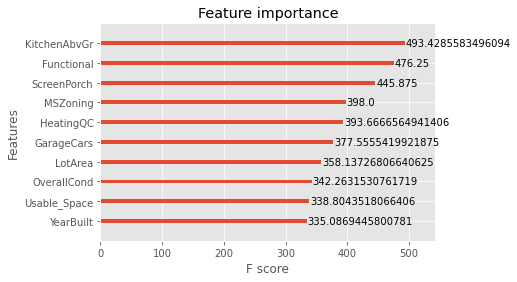

In [50]:
plot_importance(final_xgb,importance_type='cover', max_num_features=10)

## Monitoring Training Performance for XGBoost Model

In [51]:
eval_set = [(testX_trans, np.log(testY))]
final_xgb.fit(trainX_trans, np.log(trainY), eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:10.20291
[1]	validation_0-rmse:9.03801
[2]	validation_0-rmse:8.00819
[3]	validation_0-rmse:7.09483
[4]	validation_0-rmse:6.28573
[5]	validation_0-rmse:5.57100
[6]	validation_0-rmse:4.93532
[7]	validation_0-rmse:4.37523
[8]	validation_0-rmse:3.87744
[9]	validation_0-rmse:3.43580
[10]	validation_0-rmse:3.04547
[11]	validation_0-rmse:2.69842
[12]	validation_0-rmse:2.39335
[13]	validation_0-rmse:2.12225
[14]	validation_0-rmse:1.88256
[15]	validation_0-rmse:1.66989
[16]	validation_0-rmse:1.48276
[17]	validation_0-rmse:1.31695
[18]	validation_0-rmse:1.17051
[19]	validation_0-rmse:1.03943
[20]	validation_0-rmse:0.92372
[21]	validation_0-rmse:0.82124
[22]	validation_0-rmse:0.73179
[23]	validation_0-rmse:0.65257
[24]	validation_0-rmse:0.58224
[25]	validation_0-rmse:0.52062
[26]	validation_0-rmse:0.46554
[27]	validation_0-rmse:0.41728
[28]	validation_0-rmse:0.37573
[29]	validation_0-rmse:0.33755
[30]	validation_0-rmse:0.30545
[31]	validation_0-rmse:0.27772
[32]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.11421052631578947,
             max_delta_step=0, max_depth=3, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Plotting original and predicted test data in a plot to compare visually

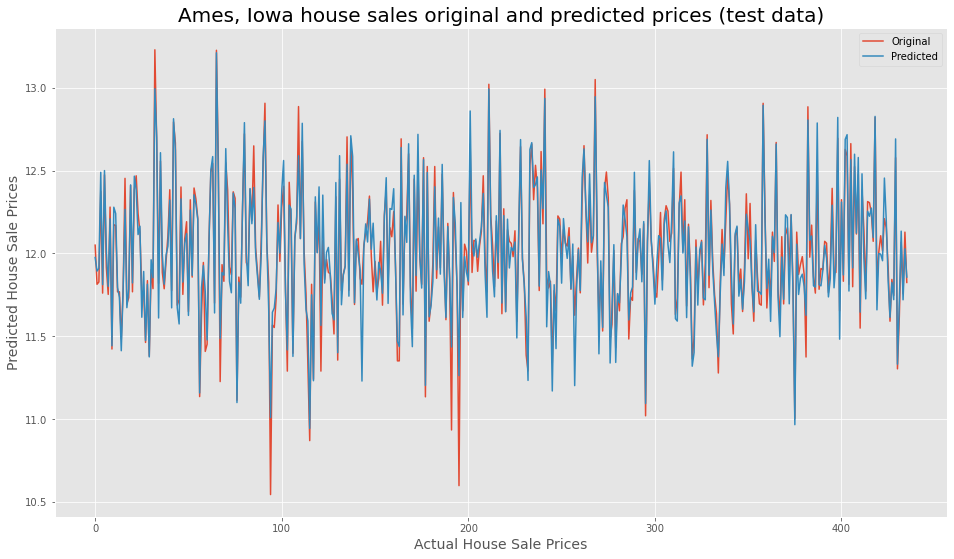

In [52]:
plt.figure(figsize = (16,9))
x_ax = range(len(np.log(testY)))
plt.plot(x_ax, np.log(testY), label="Original")
plt.plot(x_ax, final_xgb.predict(testX_trans), label="Predicted")
plt.title("Ames, Iowa house sales original and predicted prices (test data)", fontsize=20)
plt.ylabel('Predicted House Sale Prices', fontsize=14)
plt.xlabel('Actual House Sale Prices', fontsize=14)
plt.legend()
plt.show()

## Visualizing errors and predictions

In [53]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

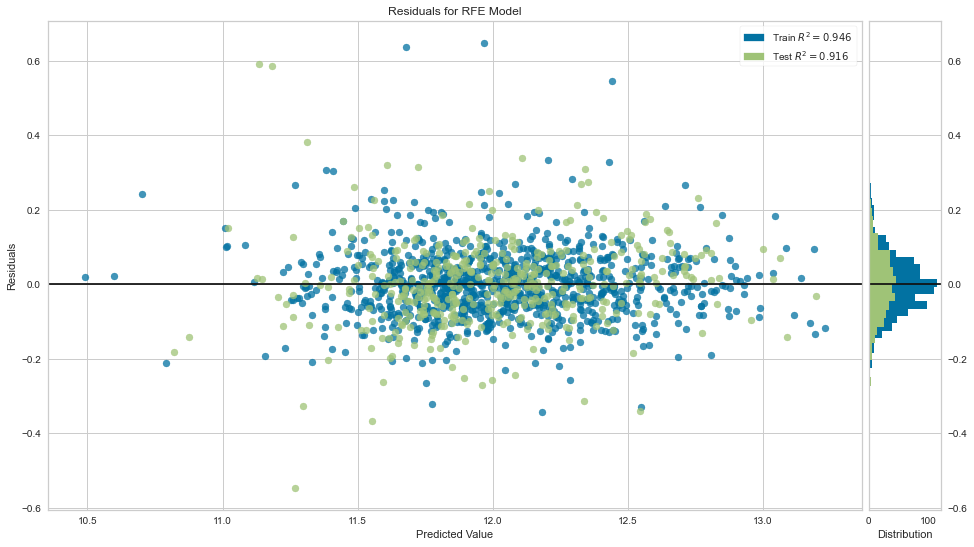

<AxesSubplot:title={'center':'Residuals for RFE Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [54]:
plt.figure(figsize = (16,9))
visualizer = ResidualsPlot(rfe)
visualizer.fit(trainX_trans, np.log(trainY))
visualizer.score(testX_trans, np.log(testY))
visualizer.poof()

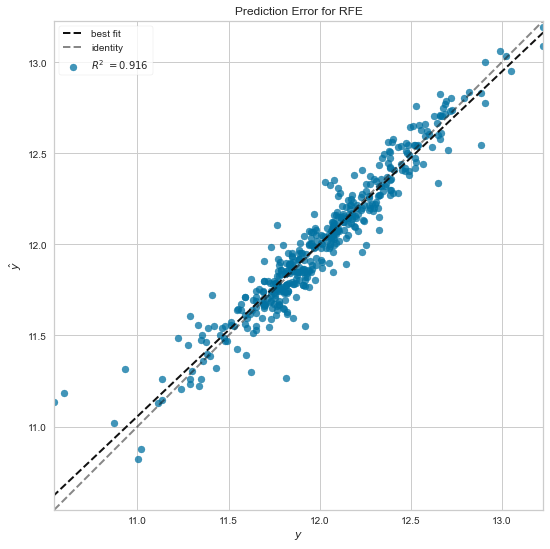

<AxesSubplot:title={'center':'Prediction Error for RFE'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [55]:
plt.figure(figsize = (16,9))
visualizer = PredictionError(rfe)
visualizer.fit(trainX_trans, np.log1p(trainY))
visualizer.score(testX_trans, np.log1p(testY))
visualizer.poof()

## Plotting tree

In [56]:
from xgboost import plot_tree

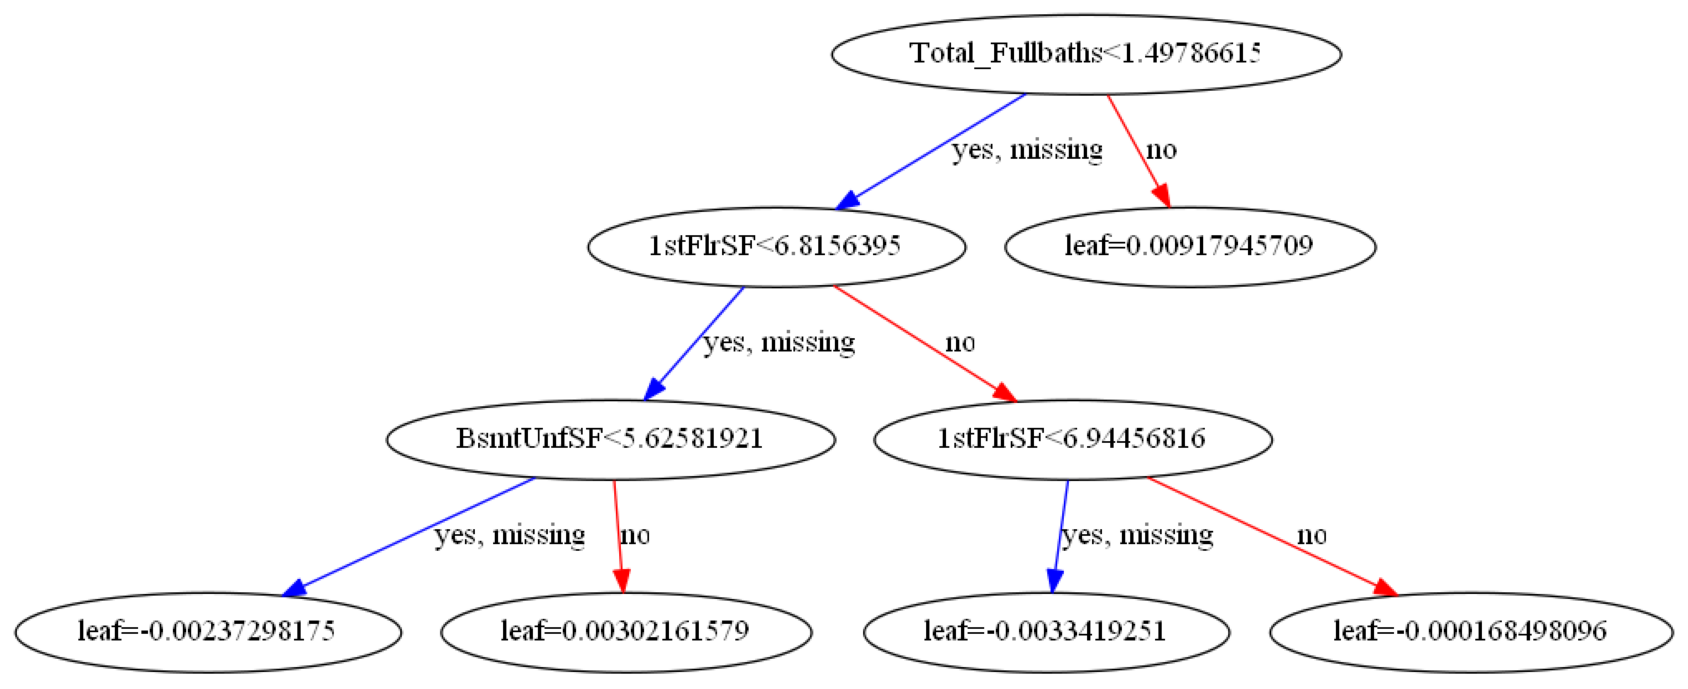

In [57]:
plot_tree(final_xgb, num_trees=final_xgb.get_booster().best_iteration)
fig = plt.gcf()
fig.set_size_inches(30,15)